In [1]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

%matplotlib inline

In [5]:
# Load the data in
df = pd.read_csv('../data/raw/wcmsp-185935.csv')
# Take a look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 14 columns):
Address                                     257 non-null object
Postal Code                                 257 non-null object
ENERGY STAR Score                           257 non-null int64
Primary Property Type                       257 non-null object
Floor Area (Building) (ft²)                 257 non-null int64
Floor Area (Parking) (ft²)                  257 non-null int64
Year Built                                  257 non-null int64
Total GHG Emissions (Metric Tons CO2e)      257 non-null int64
Site EUI (kBtu/ft²)                         257 non-null int64
Weather Normalized Site EUI (kBtu/ft²)      257 non-null int64
Source EUI (kBtu/ft²)                       257 non-null int64
Weather Normalized Source EUI (kBtu/ft²)    257 non-null int64
Water Use (kgal)                            257 non-null int64
Unnamed: 13                                 0 non-null float64
dtypes: fl

In [11]:
df.columns

Index(['Address', 'Postal Code', 'ENERGY STAR Score', 'Primary Property Type',
       'Floor Area (Building) (ft²)', 'Floor Area (Parking) (ft²)',
       'Year Built', 'Total GHG Emissions (Metric Tons CO2e)',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'Water Use (kgal)', 'Unnamed: 13'],
      dtype='object')

In [15]:
cols = ['address', 'postal_code', 'energy_star_score', 'primary_property_type',
       'building_floor_area', 'parking_floor_area',
       'year_built', 'total_ghg_emissions',
       'site_eui', 'weather_normalized_site_eui',
       'source_eui', 'weather_normalized_source_eui',
       'water_use', 'unnamed']
df.columns = cols
df.head()

,address,postal_code,energy_star_score,primary_property_type,building_floor_area,parking_floor_area,year_built,total_ghg_emissions,site_eui,weather_normalized_site_eui,source_eui,weather_normalized_source_eui,water_use,unnamed
0,201 Chicago Ave S,55415,36,Office,62400,0,2012,971,115,118,251,252,708,NaN
1,1011 Nicollet Mall,55403,68,Office,59479,0,1920,986,90,93,256,266,882,NaN
2,4701 Beard Ave S,55410,0,Other,59172,0,1914,1622,157,160,427,428,163,NaN
3,8 60Th St W,55419,76,Worship Facility,60640,62000,1959,268,50,54,77,81,674,NaN
4,700 10Th Ave S,55415,89,Office,60528,0,1920,504,74,77,136,140,414,NaN


In [17]:
model_cols = ['energy_star_score', 'primary_property_type',
       'building_floor_area', 'parking_floor_area',
       'year_built', 'total_ghg_emissions',
       'site_eui', 'weather_normalized_site_eui',
       'source_eui', 'weather_normalized_source_eui',
       'water_use']
private = df[model_cols]
private.head()

,energy_star_score,primary_property_type,building_floor_area,parking_floor_area,year_built,total_ghg_emissions,site_eui,weather_normalized_site_eui,source_eui,weather_normalized_source_eui,water_use
0,36,Office,62400,0,2012,971,115,118,251,252,708
1,68,Office,59479,0,1920,986,90,93,256,266,882
2,0,Other,59172,0,1914,1622,157,160,427,428,163
3,76,Worship Facility,60640,62000,1959,268,50,54,77,81,674
4,89,Office,60528,0,1920,504,74,77,136,140,414


In [19]:
print(df.primary_property_type.value_counts())
print('\n')
print(len(df.primary_property_type.value_counts()))

Office                                        92
Parking                                       22
Hotel                                         19
Mixed Use Property                            14
Worship Facility                              13
K-12 School                                   11
College/University                             8
Medical Office                                 7
Other                                          7
Retail Store                                   6
Residence Hall/Dormitory                       5
Fitness Center/Health Club/Gym                 5
Hospital (General Medical & Surgical)          5
Supermarket/Grocery Store                      5
Social/Meeting Hall                            3
Museum                                         3
Performing Arts                                3
Vocational School                              3
Financial Office                               3
Other - Education                              2
Outpatient Rehabilit

In [8]:
private.shape

(257, 11)

In [20]:
X=patsy.dmatrix('primary_property_type',data=df,return_type='dataframe')
X.head()

,Intercept,primary_property_type[T.College/University],primary_property_type[T.Convention Center],primary_property_type[T.Financial Office],primary_property_type[T.Fitness Center/Health Club/Gym],primary_property_type[T.Hospital (General Medical & Surgical)],primary_property_type[T.Hotel],primary_property_type[T.Indoor Arena],primary_property_type[T.K-12 School],primary_property_type[T.Library],...,primary_property_type[T.Residence Hall/Dormitory],primary_property_type[T.Restaurant],primary_property_type[T.Retail Store],primary_property_type[T.Social/Meeting Hall],primary_property_type[T.Strip Mall],primary_property_type[T.Supermarket/Grocery Store],primary_property_type[T.Transportation Terminal/Station],primary_property_type[T.Urgent Care/Clinic/Other Outpatient],primary_property_type[T.Vocational School],primary_property_type[T.Worship Facility]
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
private2 = private.join(X)

private2.head()

,energy_star_score,primary_property_type,building_floor_area,parking_floor_area,year_built,total_ghg_emissions,site_eui,weather_normalized_site_eui,source_eui,weather_normalized_source_eui,...,primary_property_type[T.Residence Hall/Dormitory],primary_property_type[T.Restaurant],primary_property_type[T.Retail Store],primary_property_type[T.Social/Meeting Hall],primary_property_type[T.Strip Mall],primary_property_type[T.Supermarket/Grocery Store],primary_property_type[T.Transportation Terminal/Station],primary_property_type[T.Urgent Care/Clinic/Other Outpatient],primary_property_type[T.Vocational School],primary_property_type[T.Worship Facility]
0,36,Office,62400,0,2012,971,115,118,251,252,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,68,Office,59479,0,1920,986,90,93,256,266,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Other,59172,0,1914,1622,157,160,427,428,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,76,Worship Facility,60640,62000,1959,268,50,54,77,81,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,89,Office,60528,0,1920,504,74,77,136,140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
private_corr = private.corr()
private_corr

,energy_star_score,building_floor_area,parking_floor_area,year_built,total_ghg_emissions,site_eui,weather_normalized_site_eui,source_eui,weather_normalized_source_eui,water_use
energy_star_score,1.000000,0.210831,-0.070985,-0.030032,0.118388,-0.191737,-0.193383,-0.157769,-0.159197,0.036320
building_floor_area,0.210831,1.000000,0.394335,0.140977,0.812742,-0.097763,-0.100324,-0.078606,-0.078910,0.666414
parking_floor_area,-0.070985,0.394335,1.000000,0.170386,0.127658,0.042580,0.033221,0.139503,0.134260,0.103039
year_built,-0.030032,0.140977,0.170386,1.000000,0.110492,0.112230,0.094085,0.125305,0.113304,0.082999
total_ghg_emissions,0.118388,0.812742,0.127658,0.110492,1.000000,0.156140,0.157392,0.134586,0.137640,0.804952
site_eui,-0.191737,-0.097763,0.042580,0.112230,0.156140,1.000000,0.991321,0.947114,0.943853,0.141191
weather_normalized_site_eui,-0.193383,-0.100324,0.033221,0.094085,0.157392,0.991321,1.000000,0.934676,0.944558,0.140606
source_eui,-0.157769,-0.078606,0.139503,0.125305,0.134586,0.947114,0.934676,1.000000,0.994791,0.077249
weather_normalized_source_eui,-0.159197,-0.078910,0.134260,0.113304,0.137640,0.943853,0.944558,0.994791,1.000000,0.078040
water_use,0.036320,0.666414,0.103039,0.082999,0.804952,0.141191,0.140606,0.077249,0.078040,1.000000


In [24]:
private2_corr = private2.corr()
private2_corr

,energy_star_score,building_floor_area,parking_floor_area,year_built,total_ghg_emissions,site_eui,weather_normalized_site_eui,source_eui,weather_normalized_source_eui,water_use,...,primary_property_type[T.Residence Hall/Dormitory],primary_property_type[T.Restaurant],primary_property_type[T.Retail Store],primary_property_type[T.Social/Meeting Hall],primary_property_type[T.Strip Mall],primary_property_type[T.Supermarket/Grocery Store],primary_property_type[T.Transportation Terminal/Station],primary_property_type[T.Urgent Care/Clinic/Other Outpatient],primary_property_type[T.Vocational School],primary_property_type[T.Worship Facility]
energy_star_score,1.000000,0.210831,-0.070985,-0.030032,0.118388,-0.191737,-0.193383,-0.157769,-0.159197,0.036320,...,0.059239,-0.063249,0.153377,-0.109982,-0.063249,0.092748,-0.063249,-0.063249,-0.109982,0.021225
building_floor_area,0.210831,1.000000,0.394335,0.140977,0.812742,-0.097763,-0.100324,-0.078606,-0.078910,0.666414,...,-0.068611,-0.033434,0.027136,-0.045373,-0.029951,-0.077050,-0.007847,-0.026063,-0.041303,-0.117712
parking_floor_area,-0.070985,0.394335,1.000000,0.170386,0.127658,0.042580,0.033221,0.139503,0.134260,0.103039,...,-0.059123,-0.027964,0.022214,-0.041716,-0.010304,-0.063024,-0.027964,-0.027964,0.057138,-0.054640
year_built,-0.030032,0.140977,0.170386,1.000000,0.110492,0.112230,0.094085,0.125305,0.113304,0.082999,...,0.038507,-0.053876,0.061537,-0.101592,0.046767,0.118472,0.050179,0.016062,-0.093682,-0.145664
total_ghg_emissions,0.118388,0.812742,0.127658,0.110492,1.000000,0.156140,0.157392,0.134586,0.137640,0.804952,...,-0.065454,-0.008720,0.001961,-0.048940,-0.011219,-0.011058,-0.021332,-0.024362,-0.040159,-0.122157
site_eui,-0.191737,-0.097763,0.042580,0.112230,0.156140,1.000000,0.991321,0.947114,0.943853,0.141191,...,-0.033792,0.124290,-0.057068,-0.028600,0.061971,0.247112,-0.027613,-0.019044,-0.009636,-0.120127
weather_normalized_site_eui,-0.193383,-0.100324,0.033221,0.094085,0.157392,0.991321,1.000000,0.934676,0.944558,0.140606,...,-0.031775,0.123943,-0.056552,-0.025496,0.063223,0.246424,-0.023629,-0.018249,-0.005448,-0.111504
source_eui,-0.157769,-0.078606,0.139503,0.125305,0.134586,0.947114,0.934676,1.000000,0.994791,0.077249,...,-0.045267,0.092855,-0.024492,-0.031821,0.048796,0.258986,-0.031258,-0.015132,-0.019469,-0.122232
weather_normalized_source_eui,-0.159197,-0.078910,0.134260,0.113304,0.137640,0.943853,0.944558,0.994791,1.000000,0.078040,...,-0.043629,0.092934,-0.024278,-0.030273,0.049657,0.258542,-0.029160,-0.013970,-0.017149,-0.117627
water_use,0.036320,0.666414,0.103039,0.082999,0.804952,0.141191,0.140606,0.077249,0.078040,1.000000,...,-0.008276,-0.002768,-0.004310,-0.035463,-0.034569,-0.045009,0.025357,-0.019568,-0.010038,-0.105440


In [26]:
private_corr['energy_star_score'].sort_values(ascending = False)

energy_star_score                1.000000
building_floor_area              0.210831
total_ghg_emissions              0.118388
water_use                        0.036320
year_built                      -0.030032
parking_floor_area              -0.070985
source_eui                      -0.157769
weather_normalized_source_eui   -0.159197
site_eui                        -0.191737
weather_normalized_site_eui     -0.193383
Name: energy_star_score, dtype: float64

In [27]:
private2_corr['energy_star_score'].sort_values(ascending = False)

energy_star_score                                                      1.000000
primary_property_type[T.Office]                                        0.516813
building_floor_area                                                    0.210831
primary_property_type[T.Retail Store]                                  0.153377
primary_property_type[T.Financial Office]                              0.120457
total_ghg_emissions                                                    0.118388
primary_property_type[T.Supermarket/Grocery Store]                     0.092748
primary_property_type[T.K-12 School]                                   0.079287
primary_property_type[T.Residence Hall/Dormitory]                      0.059239
primary_property_type[T.Hotel]                                         0.054762
water_use                                                              0.036320
primary_property_type[T.Worship Facility]                              0.021225
primary_property_type[T.Hospital (Genera

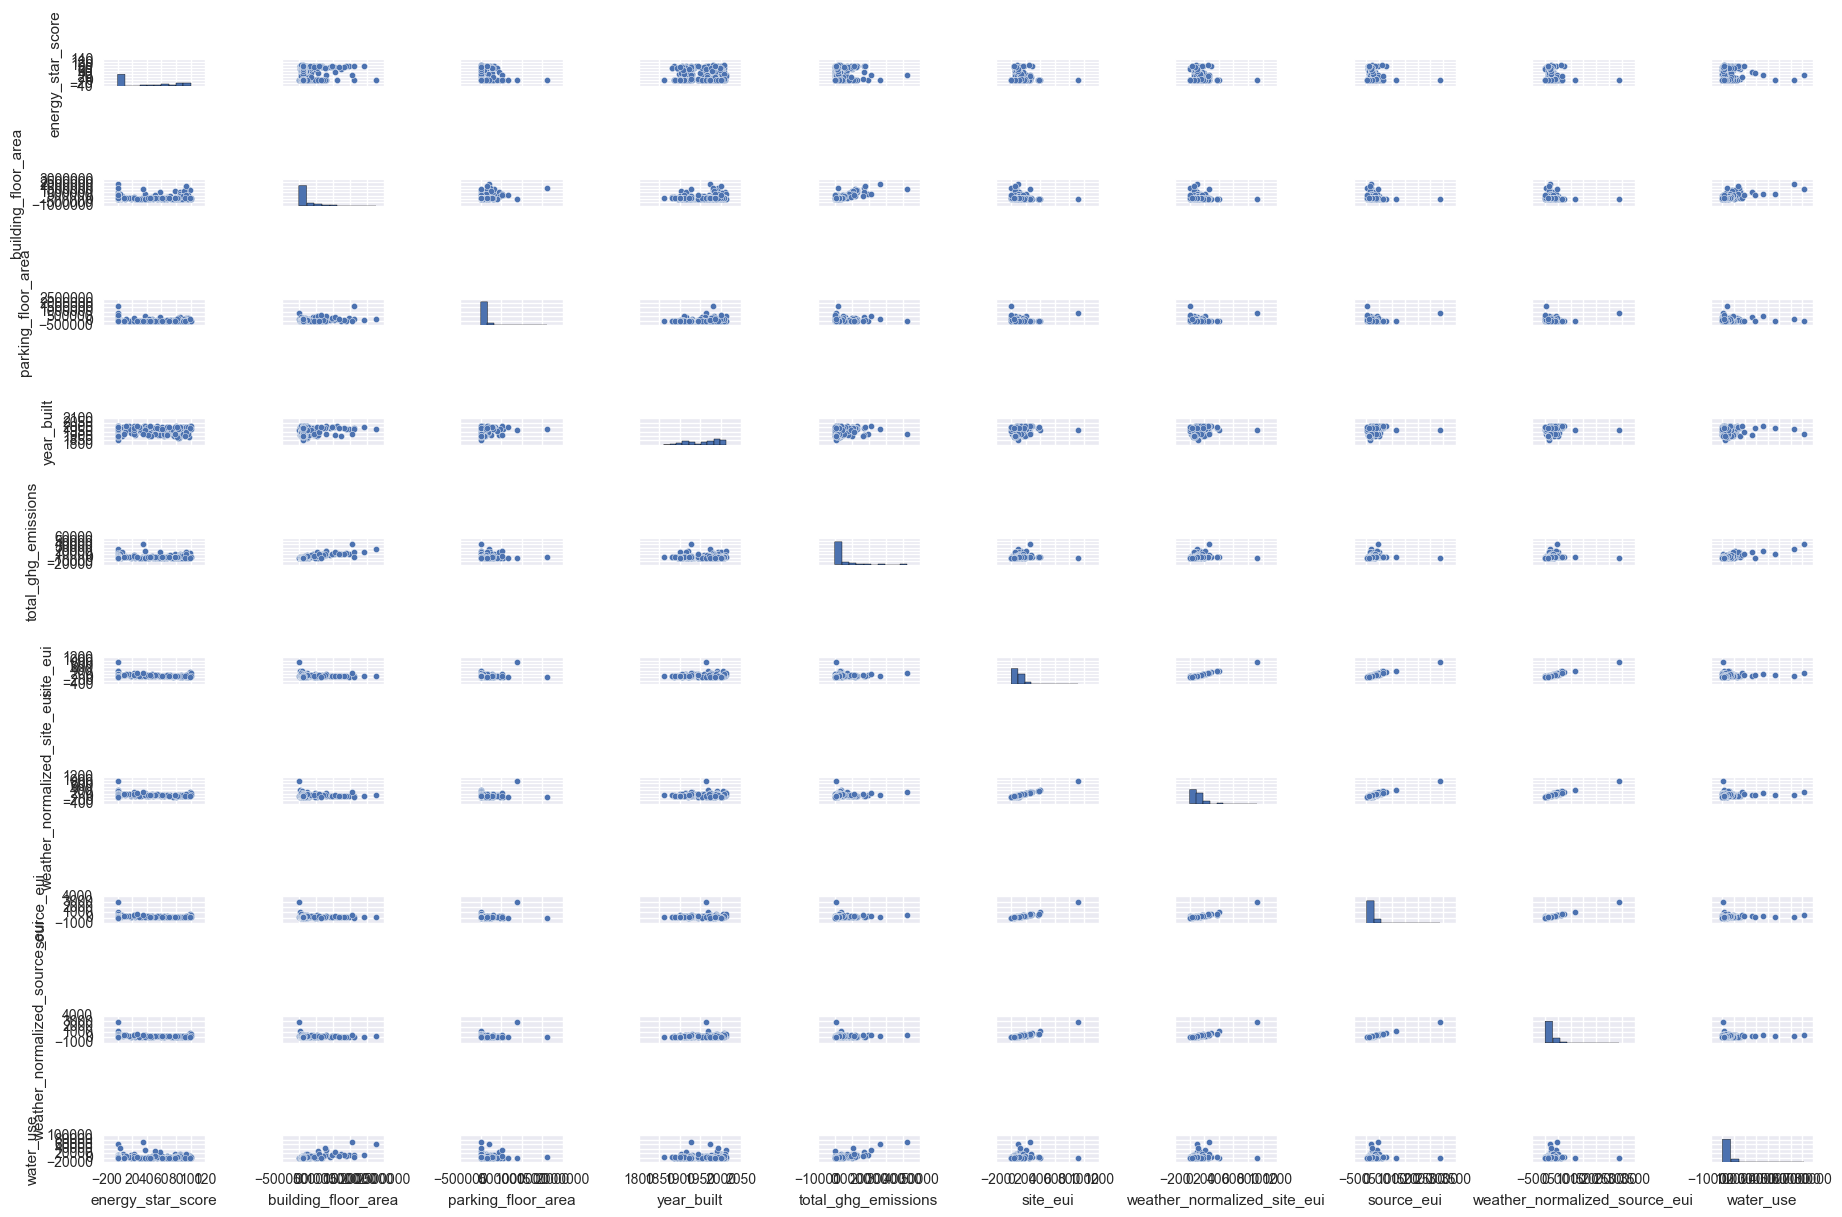

In [28]:
sns.pairplot(private, size = 1.2, aspect=1.5)

In [41]:
y,X = patsy.dmatrices('energy_star_score ~ building_floor_area + parking_floor_area + total_ghg_emissions + total_ghg_emissions:building_floor_area + site_eui + weather_normalized_site_eui + source_eui + weather_normalized_source_eui', data=private, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_star_score   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     4.925
Date:                Wed, 25 Jan 2017   Prob (F-statistic):           1.15e-05
Time:                        22:50:15   Log-Likelihood:                -1285.1
No. Observations:                 257   AIC:                             2588.
Df Residuals:                     248   BIC:                             2620.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Intercept                                  39.8628      5.212      7.649      0.000        29.598    50.128
building_floor_area                      6.335e-05   1.59e-05      3.992      0.000      3.21e-05  9.46e-05
parking_floor_area                      -6.936e-05   1.85e-05     -3.749      0.000        -0.000 -3.29e-05
total_ghg_emissions                      7.251e-05      0.001      0.055      0.956        -0.003     0.003
total_ghg_emissions:building_floor_area  -1.77e-09    8.5e-10     -2.082      0.038     -3.44e-09 -9.57e-11
site_eui                                   -0.4561      1.074     -0.425      0.671        -2.571     1.659
weather_normalized_site_eui                 0.2186      1.046      0.209      0.835        -1.841     2.278
source_eui                                  0.2032      0.510      0.399      0.691        -0.801     1.207
weather_normalized_source_eui              -0.1319      0.501     -0.263      0.793        -1.119     0.855
==============================================================================
Omnibus:                      758.485   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.301
Skew:                           0.110   Prob(JB):                     2.37e-05
Kurtosis:                       1.607   Cond. No.                     1.65e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
import statsmodels.api as sm

y = private2.energy_star_score
x = private2.drop(['energy_star_score'],1)

lsm = sm.OLS(y,x)
fit2 = lsm.fit()
fit2.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).